In [15]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.zscoring as zscoring
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import pickle
import re

In [16]:
pd.set_option('display.max_colwidth', 0)  # 0 means unlimited in newer pandas versions

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Don’t truncate column contents
pd.set_option("display.max_colwidth", None)

# Expand the display to the full width of the screen
pd.set_option("display.width", 0)


psth z-score df

In [17]:
df_path = r"C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\other_peoples_sutff\Thomas\reward_comp\outputs\zscores_global_baseline.csv"

In [18]:
big_df = pd.read_csv(df_path)
big_df.head()

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.093333,0.675813,0.075,-0.027128,not sig,40
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,0.436667,1.733876,0.270,-0.096124,not sig,40
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,0.053333,0.486194,0.185,0.270811,not sig,40
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,0.708333,2.031920,0.690,-0.009023,not sig,40
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,3.223333,5.619800,3.215,-0.001483,not sig,40


putative types df

In [19]:
path = r"C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\other_peoples_sutff\Thomas\data\umap_df_detail.pkl"

putative_df = pd.read_pickle(path)
print(type(putative_df))
print(putative_df.info())


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               509 non-null    float32
 1   y               509 non-null    float32
 2   waveform        509 non-null    object 
 3   cluster_id      509 non-null    int64  
 4   cluster_color   509 non-null    object 
 5   firing_rate     509 non-null    float64
 6   recording_name  509 non-null    object 
 7   unit_id         509 non-null    float64
dtypes: float32(2), float64(2), int64(1), object(3)
memory usage: 28.0+ KB
None


In [20]:
putative_df.head()

,x,y,waveform,cluster_id,cluster_color,firing_rate,recording_name,unit_id
0,5.911690,3.481142,"[0.073796555, 0.07865039, 0.08275838, 0.08891847, 0.09427249, 0.09658304, 0.10240583, 0.10898902, 0.10652443, 0.108936, 0.12274805, 0.117545344, 0.10618945, 0.1317988, 0.13504814, 0.089694306, 0.14443003, 0.22856435, -0.0616891, -0.688187, -1.0, -0.7645074, -0.45683914, -0.3580045, -0.29151043, -0.17502664, -0.09858758, -0.053391613, 0.0071499646, 0.057415854, 0.08538629, 0.114123836, 0.14220043, 0.15829277, 0.16810119, 0.17473005, 0.17407921, 0.16828306, 0.16124697, 0.15244444]",0,"[0.18995, 0.07176, 0.23217, 1.0]",11.421351,20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec,6.0
1,-1.312240,1.735924,"[0.022642449, 0.023726644, 0.024290858, 0.026802436, 0.026945133, 0.023564735, 0.024857813, 0.02587914, 0.016778504, 0.014451105, 0.021433521, 0.005768637, -0.009138875, 0.01500768, 0.0025634184, -0.046844978, 0.059751596, 0.22977664, -0.012590707, -0.65863305, -1.0, -0.6978908, -0.19586448, 0.10678961, 0.2534766, 0.3289869, 0.32078785, 0.27248737, 0.2346447, 0.19450271, 0.1487241, 0.11794416, 0.09851778, 0.07744057, 0.057969227, 0.04362283, 0.030958472, 0.019631816, 0.010825558, 0.003385785]",1,"[0.2483, 0.24143, 0.61286, 1.0]",20.851808,20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec,7.0
2,6.980694,4.420054,"[0.07767192, 0.08222706, 0.0854447, 0.08660365, 0.08653599, 0.08837416, 0.09528553, 0.097514756, 0.08681223, 0.08266026, 0.090142675, 0.080829985, 0.07620996, 0.108092904, 0.10303889, 0.06150733, 0.14654355, 0.24099529, -0.07097618, -0.6997671, -1.0, -0.7848239, -0.4997067, -0.3831539, -0.29139665, -0.17194234, -0.09367988, -0.035472628, 0.040310767, 0.105388805, 0.14668469, 0.18294095, 0.21231788, 0.22300385, 0.22145525, 0.21650554, 0.2065461, 0.19037248, 0.17079, 0.15016222]",2,"[0.27509, 0.40072, 0.86692, 1.0]",0.703073,20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec,13.0
3,6.616679,9.887720,"[0.10222672, 0.10961207, 0.11720836, 0.122646436, 0.12704374, 0.13294218, 0.13824289, 0.13979419, 0.14136139, 0.14546634, 0.14712623, 0.14740865, 0.15056157, 0.14728096, 0.1395958, 0.14314586, 0.10034102, -0.114597544, -0.504522, -0.86693174, -1.0, -0.89542204, -0.6842754, -0.4820761, -0.32176876, -0.18817449, -0.07464801, 0.00945118, 0.06555013, 0.10846384, 0.14774041, 0.18402426, 0.21570916, 0.24124642, 0.25955155, 0.26924822, 0.2678708, 0.25607133, 0.23870467, 0.21906157]",3,"[0.26878, 0.54995, 0.99303, 1.0]",0.689034,20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec,15.0
4,6.297206,7.045398,"[0.09790988, 0.103863746, 0.11158419, 0.11970535, 0.12148073, 0.12040602, 0.1275064, 0.13727693, 0.13698561, 0.13509242, 0.1399387, 0.13815345, 0.1352684, 0.14626664, 0.13863538, 0.10731214, 0.111693054, 0.062028028, -0.26372892, -0.7655052, -1.0, -0.82607305, -0.5640998, -0.42941046, -0.33153138, -0.21092936, -0.1276966, -0.08368323, -0.031681184, 0.02930024, 0.08502299, 0.13977303, 0.19015841, 0.22518036, 0.24409425, 0.25069183, 0.24767934, 0.23865388, 0.22472686, 0.20624371]",4,"[0.18625, 0.69775, 0.95498, 1.0]",1.060053,20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec,16.0


putative df saved 'unit_id' as floats and psth z-score df saved 'Unit number' as objects. Converting both to strings

In [26]:
big_df['Unit number'] = big_df['Unit number'].astype(int).astype(str)

In [27]:
putative_df['unit_id'] = putative_df['unit_id'].astype(int).astype(str)

In [28]:
len(putative_df)

509

In [29]:
putative_df['unit_id'].nunique()

231

In [30]:
big_df['Unit number'].nunique()

251

In [31]:
# Merge event_zscores_df with umap_df_detail based on 'Recording' and 'Unit number'
merged_df = big_df.merge(
    putative_df[['recording_name', 'unit_id', 'cluster_id']],  # Only select necessary columns
    how='left',
    left_on=['Recording', 'Unit number'],
    right_on=['recording_name', 'unit_id']
)

# Create the 'putative type' column based on the 'cluster_id'
merged_df['putative type'] = merged_df['cluster_id'].apply(lambda x: 'interneuron' if x == 5 else 'pyramidal')

# Drop the unnecessary columns
merged_df = merged_df.drop(columns=['recording_name', 'unit_id', 'cluster_id'])

In [32]:
merged_df.head()

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows,putative type
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.093333,0.675813,0.075,-0.027128,not sig,40,pyramidal
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,0.436667,1.733876,0.270,-0.096124,not sig,40,pyramidal
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,0.053333,0.486194,0.185,0.270811,not sig,40,pyramidal
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,0.708333,2.031920,0.690,-0.009023,not sig,40,pyramidal
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,3.223333,5.619800,3.215,-0.001483,not sig,40,pyramidal


In [37]:
sig_merged_df = merged_df.query(''' sig != "not sig" ''')
sig_merged_df.head()

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows,putative type
336,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,52,0.598333,2.049638,4.370000,1.840162,increase,40,pyramidal
339,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,68,0.025000,0.368996,1.030000,2.723605,increase,40,pyramidal
386,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,high_comp_win,52,0.598333,2.049638,5.700000,2.489057,increase,1,pyramidal
446,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,low_comp_win,52,0.598333,2.049638,4.800000,2.049955,increase,6,pyramidal
449,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,low_comp_win,68,0.025000,0.368996,0.983333,2.597136,increase,6,pyramidal


In [44]:
not_sig_df = merged_df.query(''' sig == "not sig" ''')
not_sig_df.head()

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows,putative type
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.093333,0.675813,0.075,-0.027128,not sig,40,pyramidal
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,0.436667,1.733876,0.270,-0.096124,not sig,40,pyramidal
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,0.053333,0.486194,0.185,0.270811,not sig,40,pyramidal
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,0.708333,2.031920,0.690,-0.009023,not sig,40,pyramidal
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,3.223333,5.619800,3.215,-0.001483,not sig,40,pyramidal


In [45]:
print(not_sig_df['putative type'].value_counts())

putative type
pyramidal      6230
interneuron     384
Name: count, dtype: int64


In [46]:
384/6230

0.06163723916532905

In [43]:
# print number of significant interneurons and pyramidal cells
print(sig_merged_df['putative type'].value_counts())

putative type
pyramidal      60
interneuron     3
Name: count, dtype: int64


In [48]:
inter_df = sig_merged_df[sig_merged_df['putative type'] == 'interneuron']
inter_df.head()

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows,putative type
2586,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,alone_rewarded,64,0.693220,1.762921,3.707692,1.70993,increase,39,interneuron
5692,20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec,high_comp_win,89,2.246032,4.488365,10.300000,1.79441,increase,1,interneuron
5752,20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec,win,89,2.246032,4.488365,10.300000,1.79441,increase,1,interneuron


In [47]:
3/60

0.05

In [38]:
print(sig_merged_df.columns)

Index(['Recording', 'Event name', 'Unit number', 'Global Pre-event M',
       'Global Pre-event SD', 'Event M', 'Event Z-Score', 'sig',
       'Event windows', 'putative type'],
      dtype='object')


In [39]:
# Calculate percentages of putative types in each event type
event_putative_counts = sig_merged_df.groupby(['Event name', 'putative type']).size().reset_index(name='count')

# Calculate total per event
event_totals = event_putative_counts.groupby('Event name')['count'].sum().reset_index(name='total')

# Merge back
event_putative_counts = event_putative_counts.merge(event_totals, on='Event name')

# Calculate percentage
event_putative_counts['percentage'] = (event_putative_counts['count'] / event_putative_counts['total']) * 100

# Pivot to have putative types as columns
percentage_df = event_putative_counts.pivot(index='Event name', columns='putative type', values='percentage').fillna(0)

percentage_df

putative type,interneuron,pyramidal
Event name,,
alone_rewarded,12.500000,87.500000
alone_rewarded_baseline,0.000000,100.000000
high_comp,0.000000,100.000000
high_comp_lose,0.000000,100.000000
high_comp_lose_baseline,0.000000,100.000000
high_comp_tie,0.000000,100.000000
high_comp_win,14.285714,85.714286
high_comp_win_baseline,0.000000,100.000000
lose,0.000000,100.000000


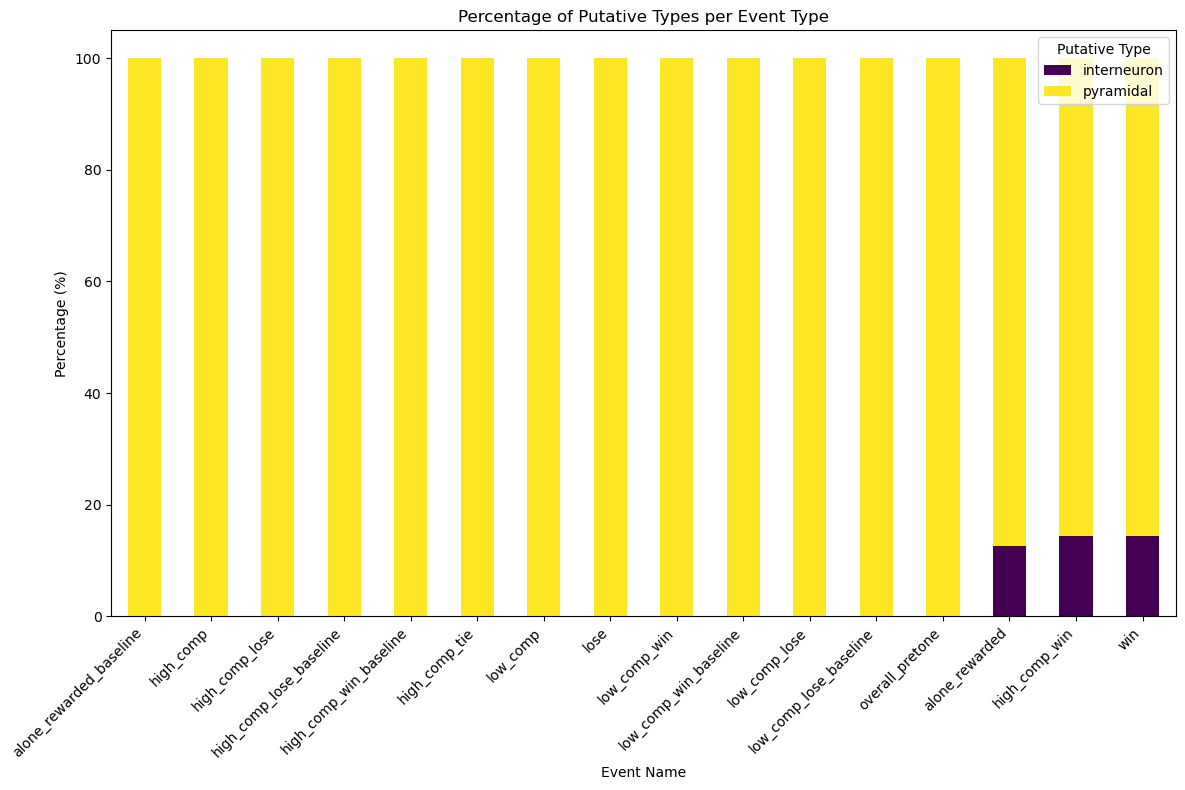

In [40]:
# Visualize the percentages as a stacked bar chart
import matplotlib.pyplot as plt

# Sort the percentage_df by the pyramidal percentage for better visualization
percentage_df_sorted = percentage_df.sort_values(by='pyramidal', ascending=False)

# Plot stacked bar chart
ax = percentage_df_sorted.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Percentage of Putative Types per Event Type')
plt.xlabel('Event Name')
plt.ylabel('Percentage (%)')
plt.legend(title='Putative Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Alone Rewarded interneurons: 0
High Comp Win interneurons: 1
Win interneurons: 1


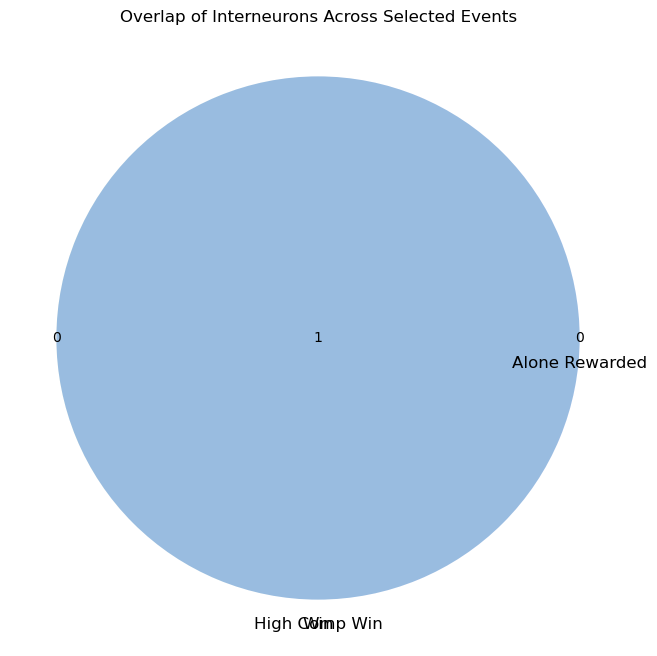

In [42]:
# Create Venn diagram for interneuron overlap across selected events
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Filter for interneurons
interneurons_df = sig_merged_df[sig_merged_df['putative type'] == 'interneuron']

# Get unique units for each event
alone_rewarded_units = set(interneurons_df[interneurons_df['Event name'] == 'alone rewarded']['Unit number'])
high_comp_win_units = set(interneurons_df[interneurons_df['Event name'] == 'high_comp_win']['Unit number'])
win_units = set(interneurons_df[interneurons_df['Event name'] == 'win']['Unit number'])

print(f"Alone Rewarded interneurons: {len(alone_rewarded_units)}")
print(f"High Comp Win interneurons: {len(high_comp_win_units)}")
print(f"Win interneurons: {len(win_units)}")

# Create Venn diagram
plt.figure(figsize=(8, 8))
venn3([alone_rewarded_units, high_comp_win_units, win_units], ('Alone Rewarded', 'High Comp Win', 'Win'))
plt.title('Overlap of Interneurons Across Selected Events')
plt.show()